$\textbf{1. Info on the data set}$

The data come from American Community Survey 2010-2012 Public Use Microdata Series.

•Major_code: Major code, FO1DP in ACS PUMS

•Major:  Major description

•Major_category: Category of major from Carnevale et al

•Total: Total number of people with major 

•Employed: number of employed (ESR == 1 or 2)

•Unemployed: number of unemployed (ESR == 3)

•Unemployment_rate： =Unemployed / (Unemployed + Employed) 


In [1]:
import pandas as pd
all=pd.read_csv('./Group6-xingzhen-homework1,28-dataset-all-ages.csv')
all.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


Firstly, I select multiple columns which I use to analyse, returning a new dataframe

In [150]:
pd.set_option('max_colwidth', 35)  # adjust column width
all['Unemployment_rate(%)']=all['Unemployment_rate']*100
all['Total(10 thousand)']=all['Total']/10000
all1=all[['Major_code','Major','Major_category','Total(10 thousand)','Employed','Unemployed','Unemployment_rate(%)']]
all1.head()

,Major_code,Major,Major_category,Total(10 thousand),Employed,Unemployed,Unemployment_rate(%)
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,12.8148,90245,2423,2.614711
1,1101,AGRICULTURE PRODUCTION AND MANA...,Agriculture & Natural Resources,9.5326,76865,2266,2.863606
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,3.3955,26321,821,3.024832
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,10.3549,81177,3619,4.267890
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,2.4280,17281,894,4.918845


Secondly, I want to find the majors of top unemployment_rate. I will sort values by Unemployment_rate in the dataframe.

In [151]:
all1[['Major','Major_category','Total(10 thousand)','Unemployment_rate(%)']].sort_values(by='Unemployment_rate(%)', ascending=False)[:10]

,Major,Major_category,Total(10 thousand),Unemployment_rate(%)
146,MISCELLANEOUS FINE ARTS,Arts,0.8511,15.614749
116,CLINICAL PSYCHOLOGY,Psychology & Social Work,0.7638,10.271216
93,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Serv...,0.4315,10.179641
27,SCHOOL STUDENT COUNSELING,Education,0.2396,10.174594
77,LIBRARY SCIENCE,Education,1.6193,9.484299
141,VISUAL AND PERFORMING ARTS,Arts,5.5141,9.465800
19,COMPUTER PROGRAMMING AND DATA P...,Computers & Mathematics,2.9317,9.026422
119,SOCIAL PSYCHOLOGY,Psychology & Social Work,1.0871,8.733625
104,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,0.4700,8.602151
11,ARCHITECTURE,Engineering,29.4692,8.599113


$\textbf{2. Explore the data}$

Firstly, I want to summarize my data by grouping it by Major_category

In [152]:
grouped=all1.groupby('Major_category')
grouped['Unemployment_rate(%)','Total(10 thousand)'].mean().sort_values(by='Unemployment_rate(%)',ascending=False)

,Unemployment_rate(%),Total(10 thousand)
Major_category,,
Arts,8.760052,22.573312
Psychology & Social Work,7.786702,22.080867
Interdisciplinary,7.726897,4.519900
Humanities & Liberal Arts,6.942871,24.922233
Communications & Journalism,6.912452,45.095550
Law & Public Policy,6.785356,18.058520
Social Science,6.568566,29.490278
Computers & Mathematics,5.943698,16.194345
Industrial Arts & Consumer Services,5.854567,14.768543


In [153]:
g=grouped['Unemployment_rate(%)','Total(10 thousand)'].mean().sort_values(by='Unemployment_rate(%)',ascending=False)

   From the table above, I can learn that "Arts" Major_category has the highest unemployment_rate, and the "Agriculture & Natural Resources" has the lowest one.

Secondly, I will draw some pictures by using plotting library.

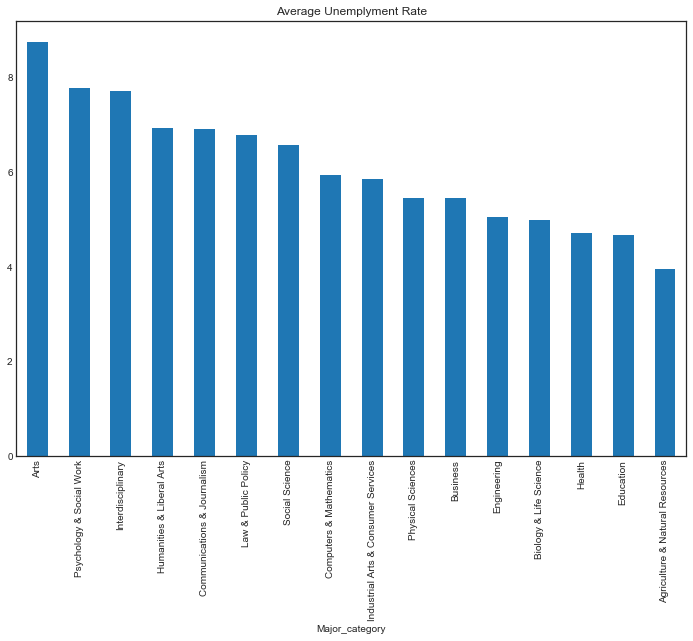

In [154]:
import matplotlib.pyplot as plt
import numpy as np
grouped=all1.groupby('Major_category')
grouped['Unemployment_rate(%)'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(12,8))
plt.title('Average Unemplyment Rate')
plt.show()

Then I will draw the scatter plots and line plots to show the relationship between " Average Total(10 thousand)" and "Average Unemployment_rate(%)" by Major_category and the relationship between "Total(10 thousand)" and "Unemployment_rate(%)" for each major.

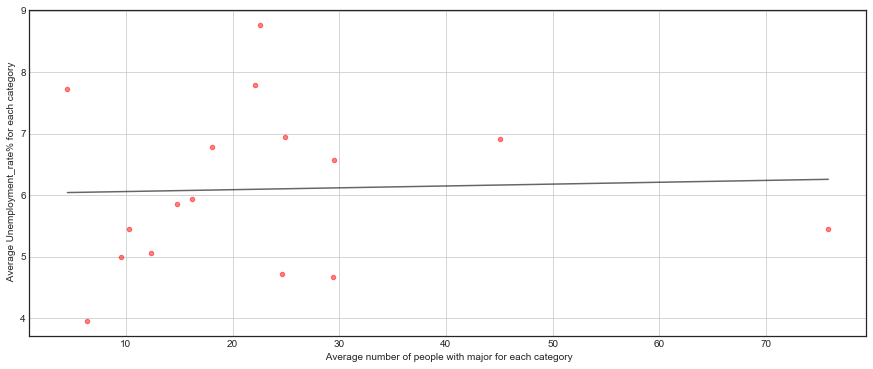

In [155]:
g.plot(x='Total(10 thousand)',y='Unemployment_rate(%)',kind='scatter',alpha=0.5,figsize=(15,6),color='red')
plt.grid()
plt.xlabel(' Average number of people with major for each category')
plt.ylabel(' Average Unemployment_rate% for each category')
plt.plot(np.unique(g['Total(10 thousand)']),
         np.poly1d(np.polyfit(g['Total(10 thousand)'], g['Unemployment_rate(%)'], 1))(np.unique(g['Total(10 thousand)'])),
         color='black', alpha=0.6)
plt.show()

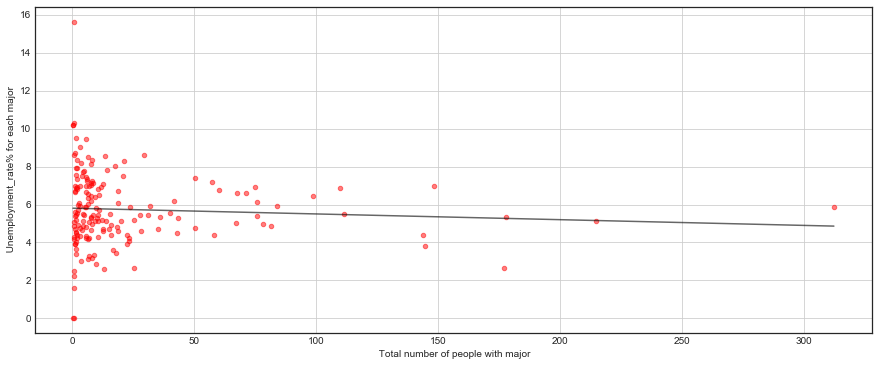

In [156]:
all1.plot(x='Total(10 thousand)',y='Unemployment_rate(%)',kind='scatter',alpha=0.5,figsize=(15,6),color='red')
plt.grid()
plt.xlabel(' Total number of people with major')
plt.ylabel(' Unemployment_rate% for each major')
plt.plot(np.unique(all1['Total(10 thousand)']),
         np.poly1d(np.polyfit(all1['Total(10 thousand)'], all1['Unemployment_rate(%)'], 1))(np.unique(all1['Total(10 thousand)'])),
         color='black', alpha=0.6)
plt.show()

Next I will use the 'season' library to draw other plots.

In [157]:
import seaborn as sns 
sns.set_style("white")

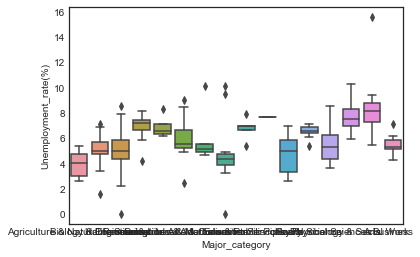

In [158]:
sns.boxplot(x='Major_category', y='Unemployment_rate(%)', data=all1)
plt.show()

$\textbf{3. Develop a hypothesis and test it econometrically}$

Accoring to the plots above, I can develop a question and ahypothesis: 

1)"Total number of people with major" may not affect the "Unemployment_rate"?

2)Which Major_category can affect the Unemployment_rate?

Fistly, I will use a linear regression model to test the fist one.

$$
Unemployment Rate_t = \beta_0 + \beta_1 total_t  + u_t
$$

* $\beta_0$ is the constant term
* $\beta_1$ is the slope term
* $u_t$ is the error term

To estimate $\beta_0$, I will need to add a column of 1's to our dataframe

In [159]:
all1['constant'] = 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


I will use statsmodels' OLS (ordinary least squares) function to estimate our linear regression model

In [160]:
import statsmodels.api as sm
reg = sm.OLS(endog=all1['Unemployment_rate(%)'], exog=all1[['constant', 'Total(10 thousand)']], missing='drop')
results = reg.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Unemployment_rate(%)   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.7589
Date:                  Sun, 28 Jan 2018   Prob (F-statistic):              0.385
Time:                          21:44:03   Log-Likelihood:                -357.24
No. Observations:                   173   AIC:                             718.5
Df Residuals:                       171   BIC:                             724.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
constant        

From the results above, I can learn that Total number of people with each major will not affect the unemployment for this major.

Next, I will add Major_category to this model. I will need dummy variables.

$$
Unemployment Rate_t = \beta_0 + \beta_1 total_t + \beta_2 Ar + \beta_3 BLS + \beta_4 Bu + \beta_5 CJ + \beta_6 CM + \beta_7 Eu + \beta_8 En + \beta_9 He + \beta_a HLA + \beta_b IACS + \beta_c In + \beta_13 d + \beta_e PS + \beta_f PSW + \beta_g SS + u_t
$$

In [161]:
dummies = pd.get_dummies(all1['Major_category'], drop_first=True)
dummies.head()

,Arts,Biology & Life Science,Business,Communications & Journalism,Computers & Mathematics,Education,Engineering,Health,Humanities & Liberal Arts,Industrial Arts & Consumer Services,Interdisciplinary,Law & Public Policy,Physical Sciences,Psychology & Social Work,Social Science
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [162]:
all1 = pd.merge(all1, dummies, left_index=True, right_index=True)
all1.head()

,Major_code,Major,Major_category,Total(10 thousand),Employed,Unemployed,Unemployment_rate(%),constant,Arts,Biology & Life Science,...,Education,Engineering,Health,Humanities & Liberal Arts,Industrial Arts & Consumer Services,Interdisciplinary,Law & Public Policy,Physical Sciences,Psychology & Social Work,Social Science
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,12.8148,90245,2423,2.614711,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1101,AGRICULTURE PRODUCTION AND MANA...,Agriculture & Natural Resources,9.5326,76865,2266,2.863606,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,3.3955,26321,821,3.024832,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,10.3549,81177,3619,4.267890,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,2.4280,17281,894,4.918845,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
reg_2 = sm.OLS(endog=all1['Unemployment_rate(%)'], 
               exog=all1[['constant','Total(10 thousand)',] + list(dummies.columns)], 
               missing='drop')
results_2 = reg_2.fit()
print(results_2.summary())

                             OLS Regression Results                             
Dep. Variable:     Unemployment_rate(%)   R-squared:                       0.390
Model:                              OLS   Adj. R-squared:                  0.327
Method:                   Least Squares   F-statistic:                     6.229
Date:                  Sun, 28 Jan 2018   Prob (F-statistic):           1.44e-10
Time:                          21:44:06   Log-Likelihood:                -314.89
No. Observations:                   173   AIC:                             663.8
Df Residuals:                       156   BIC:                             717.4
Df Model:                            16                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

The results show that...
* Arts category, Communications & Journalism category, Humanities & Liberal Arts category, Law & Public Policy category, Psychology & Social Work category and Social Science category are statistically significantly affect the Unemployment Rate.